<a href="https://colab.research.google.com/github/andssuu/moncattle/blob/master/visualization/notebooks/overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/andssuu/moncattle.git

Cloning into 'moncattle'...
remote: Enumerating objects: 208, done.
remote: Counting objects: 100% (208/208), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 208 (delta 89), reused 104 (delta 39), pack-reused 0
Receiving objects: 100% (208/208), 2.21 MiB | 13.15 MiB/s, done.
Resolving deltas: 100% (89/89), done.


## Dados dos experimentos

* 2 períodos: primeiro de 25/03/15 a 30/03/15 e de 06/04/15 a 09/04/15
* 4 animais (3 distintos)
* Foram utilizadas 4 coleiras (A, B, C e D). Entretanto, houve algumas falhas durante o experimento e, no final, ficaram as seguintes bases:
  - A2 e A3
  - B2 e B3
  - C3 e C4
  - D1, D2, D3 e D4
* Sensores: acelerômetro, giroscópio, magnetômetro e GPS
* As coletas eram feitas a cada 1 segundo para todos os sensores
* Carregamento offline dos dados por um cartão SD
* Classes de comportamentos: pastar, em pé, deitado e andando
    * **Pastando/Procurando**: caracterizado pelo animal sobre as quatros patas, com a cabeça baixa procurando ou mastigando o capim. O animal pode ou não estar em movimento, já que ele pode estar se deslocando à procura de capim;
    * **Andando**: o animal também está sobre as quatros patas, porém com o pescoço reto (apontando o fucinho para frente) e se deslocando pela área de pasto;
    * **Em Pé**: o animal está sobre as quatro patas, com a cabeça erguida e não há deslocamento;
    * **Deitado**: o animal está com as patas abaixadas e com a barriga tocando o solo.

## Base de Dados

O arquivo lomba.csv contém todos os dados aglutinados que foram utilizados. A estrutura de cabeçalho é definida da seguinte forma:

IdColar | AccX | AccY | AccZ | MagX | MagY | MagZ | GirX | GirY | GirZ | Horario | Data | VelocidadeDeslocamento | Comportamento 
 --- | --- | --- |--- |--- |--- |--- |--- |--- |--- |--- |---|---|---
A2 | -11889 | 11184 | -17877 | -1280 | -73 | -309 | -4013 | 1260 | -31 | 131911.203 | 250515 | 000.0 | Comendo/Procurando
A2 | -9144 | 8945 | -11799 | -1213 | 707 | -238 | -394 | 2278 | -602 | 131949.203 | 250515 | 000.0 | Comendo/Procurando
A2 | 6391 | 9265 | -11767 | 570 | -405 | -1533 | -1072 | -1094 | 1854 | 132148.203 | 250515 | 000.0 | EmPe
A2 | -1394 | 10206 | -13229 | 671 | -73 | -1590 | 287 | 2253 | -2760 | 132151.203 | 250515 | 000.0 | Comendo/Procurando
...| ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... 
D4 | 2152 | 7619 | -7736 | -1650 | 788 | 43 | -2980 | 3678 | -1357 | 122529.111 | 040715 | 000.0 | Comendo/Procurando


No total há 13088 amostras. A tabela a seguir mostra a segmentação das amostras por coleira

A2 | A3 | B2 | B3 | C3 | C4 | D1 | D2 | D3 | D4 | Total
--- | --- | --- |--- |--- |--- |--- |--- |--- |--- |--- | 
1112 | 2033 | 1131 | 1735 | 1852 | 406 | 1126 | 1690 | 1598 | 405 | 13088


In [ ]:
import math
from datetime import datetime

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib
import matplotlib.pyplot as plt

df = pd.read_csv("moncattle/data/lomba.csv", float_precision='high')
df.head()

,id_colar,acc_x,acc_y,acc_z,mag_x,mag_y,mag_z,giro_x,giro_y,giro_z,horario,data,velocidade_deslocamento,comportamento
0,A2,-11889,11184,-17877,-1280,-73,-309,-4013,1260,-31,131911.203,250515,0.0,Pastando
1,A2,-9144,8945,-11799,-1213,707,-238,-394,2278,-602,131949.203,250515,0.0,Pastando
2,A2,6391,9265,-11767,570,-405,-1533,-1072,-1094,1854,132148.203,250515,0.0,EmPe
3,A2,-1394,10206,-13229,671,-73,-1590,287,2253,-2760,132151.203,250515,0.0,Pastando
4,A2,-4864,5953,-10472,-84,-200,-1767,-7101,9206,-3595,132154.203,250515,0.0,Pastando


## Visualização dos Dados

[5732, 3736, 1229, 2391]

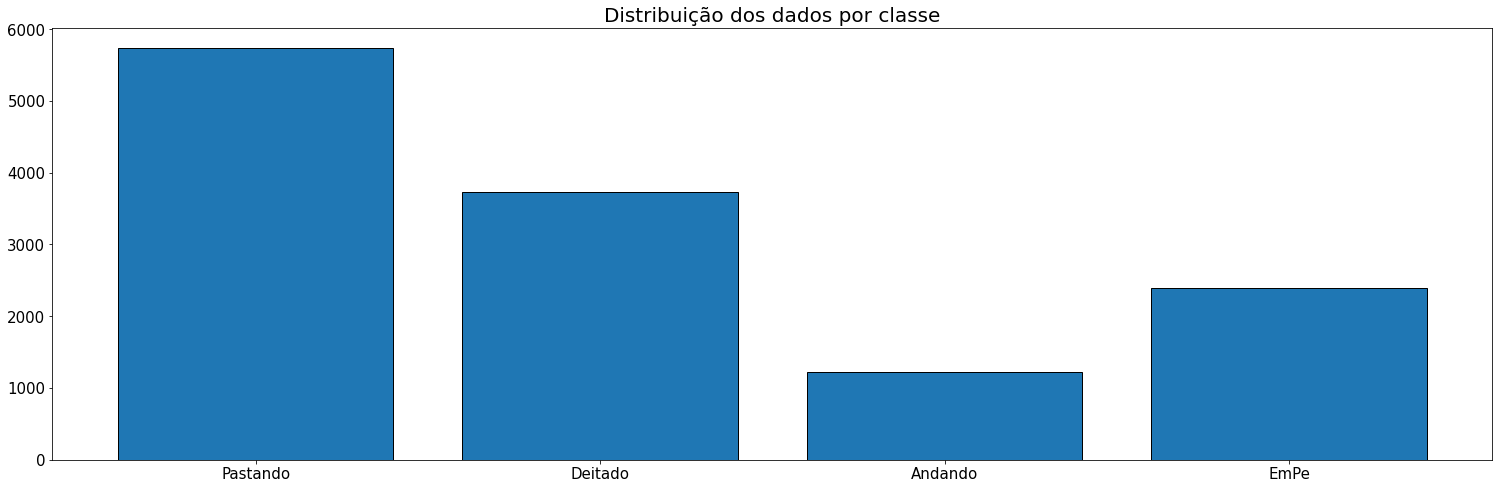

In [ ]:
fig = plt.figure(figsize=(20, 6))
plt.rcParams.update({'font.size': 15})
ax = fig.add_axes([0,1,1,1])
comportamentos = list(set(df.comportamento.values))
ax.set_title('Distribuição dos dados por classe', fontsize=20)
count_list = [sum(df.comportamento==comportamento) for comportamento in comportamentos]
ax.bar(comportamentos, count_list, edgecolor='black')
count_list

## Notebooks Sensores

* [Acelerômetro](https://colab.research.google.com/github/andssuu/moncattle/blob/master/visualization/notebooks/accelerometer.ipynb)

* [Giroscópio](https://colab.research.google.com/github/andssuu/moncattle/blob/master/visualization/notebooks/gyroscope.ipynb)

* [Magnetômetro](https://colab.research.google.com/github/andssuu/moncattle/blob/master/visualization/notebooks/magnetometer.ipynb)



## Comparações Weka

O autor utilizou a ferramenta WEKA para avaliar os modelos. A tabela abaixo contém os dados dos classificadores que obtiveram as melhores acurácias. A última coluna representa as novas acurácias que foram obtidas.

Categoria | Algoritmo | Acurácia (%) | Acurácia² (%) 
--- | --- | --- | ---
trees | Random Forest | 93.9868 | 94.1397
meta | Rotation Forest | 93.7576 | 93.6889
meta | Random Committee | 93.4749 | 93.4597
meta | END | 93,0012 | ---
meta | Bagging | 92,7338 | 92.6956
meta | Decorate | 92,4587 | 92.5733
lazy | IB1 | 91,8627 | 91.8628
lazy | IBk | 91,8627 | 91.8628
trees | J48 graft | 91,4349 | 91.03
meta | Classification Via Regression | 91,4043 | 91.4043

## Algoritmos

* [SOM](https://colab.research.google.com/github/andssuu/moncattle/blob/master/unsupervised/notebooks/som.ipynb)

* [K-Means](https://colab.research.google.com/github/andssuu/moncattle/blob/master/unsupervised/notebooks/k_means.ipynb)

* [MLP](https://colab.research.google.com/github/andssuu/redes_neurais_pos/blob/main/projeto/notebooks/main.ipynb)

* RBF

* SVM


## Links

[Dissertação Luiz Lomba](https://repositorio.ufms.br/jspui/bitstream/123456789/2627/1/LUIZ%20FERNANDO%20DELBONI%20LOMBA.pdf)
